# Laboratorium 1


### Konfiguracja

In [153]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)
[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [154]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(self.lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        plt.close()
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})

### Przykład użycia

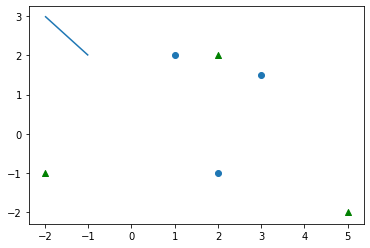

In [155]:
%matplotlib inline

plot = Plot([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
             PointsCollection([(5, -2), (2, 2), (-2, -1)], color = 'green', marker = "^")], 
            [LinesCollection([[(-1,2),(-2,3)]])])
plot.draw()

# Rozwiązanie

## zad 1, 2

### dataset 1

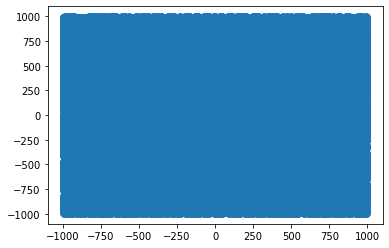

In [156]:
%matplotlib inline
def zad_1_a():
    p = []
    for i in range(0, pow(10, 5)):
        p.append((random.uniform(-1000, 1000), random.uniform(-1000, 1000)))
    return p

plot = Plot([PointsCollection(zad_1_a())])
plot.draw()

### dataset 2

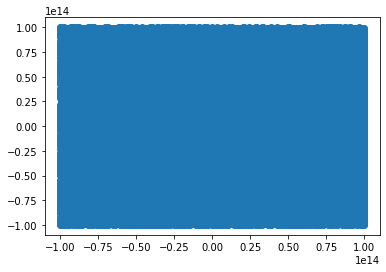

In [157]:
%matplotlib inline
def zad_1_b():
    p = []
    for i in range(0, pow(10, 5)):
        p.append((random.uniform(-pow(10, 14), pow(10, 14)), random.uniform(-pow(10, 14), pow(10, 14))))
    return p

plot = Plot([PointsCollection(zad_1_b())])
plot.draw()

### dataset 3

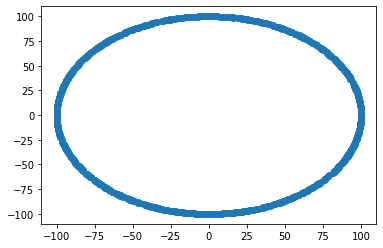

In [158]:
%matplotlib inline
def zad_1_c():
    p = []
    for i in range(0, 1000):
        theta = random.random() * 2 * np.pi
        p.append((np.cos(theta) * 100, np.sin(theta) * 100))
    return p

plot = Plot([PointsCollection(zad_1_c())])
plot.draw()

### dataset 4

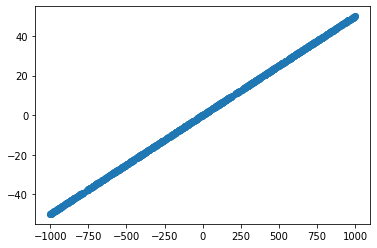

In [159]:
%matplotlib inline
def zad_1_d():
    points = []
    a = [-1.0, 0.0]
    b = [1.0, 0.1]
    m = (b[1] - a[1]) / (b[0] - a[0])
    c = a[1] - a[0] * m
    for i in range(0, 1000):
        x = random.uniform(-1000, 1000)
        y = m * x + c
        points.append((x, y))
    return points

plot = Plot([PointsCollection(zad_1_d())])
plot.draw()

In [160]:
def det_2x2(c, epsilon=0):
    a = (-1.0, 0.0, 1)
    b = (1.0, 0.1, 1)
    c = (c[0], c[1], 1)
    det = a[0] * b[1] * c[2] + a[1] * b[2] * c[0] + a[2] * b[0] * c[1] - a[2] * b[1] * c[0] - a[1] * b[0] * c[2] - a[
        0] * b[2] * c[1]
    if det < -epsilon:
        return -1
    if det > epsilon:
        return 1
    else:
        return 0


def det_3x3(c, epsilon=0):
    a = (-1.0, 0.0)
    b = (1.0, 0.1)
    ca = (c[0] - a[0], c[1] - a[1])
    cb = (c[0] - b[0], c[1] - b[1])
    det = ca[0] * cb[1] - ca[1] * cb[0]
    if det < -epsilon:
        return -1
    if det > epsilon:
        return 1
    else:
        return 0

def calculate_positions(dataset, determinant, epsilon):
    left = []
    on = []
    right = []
    for p in dataset:
        if determinant(p, epsilon)>0:
            left.append(p)
        elif determinant(p, epsilon)<0:
            right.append(p)
        else:
            on.append(p)
    print('points left to the line = ' + str(len(left)))
    print('points on the line = ' + str(len(on)))
    print('points right to the line = ' + str(len(right)))
    return PointsCollection(left), PointsCollection(right), PointsCollection(on)
    

#zad 3, 4
    

## dataset 1

In [161]:
dataset = zad_1_a()

### epsilon = 0

In [162]:
epsilon = 0


#### wyznacznik 2x2

points left to the line = 50049
points on the line = 0
points tight to the line = 49951


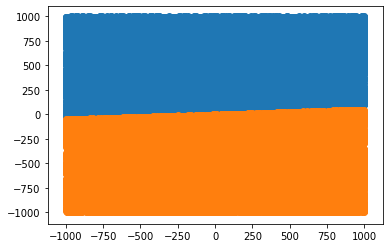

In [163]:
%matplotlib inline
points = calculate_positions(dataset, det_2x2, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()   




#### wyznacznik 3x3

points left to the line = 50049
points on the line = 0
points tight to the line = 49951


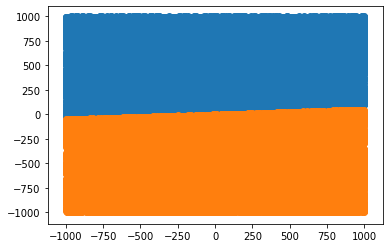

In [164]:

%matplotlib inline
points = calculate_positions(dataset, det_3x3, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()


#### difference

points allocated differently = 0


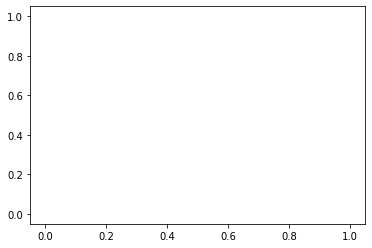

In [165]:
%matplotlib inline
diff =  [x for x in dataset if det_2x2(x, epsilon)!=det_3x3(x,epsilon)]
print('points allocated differently = ' + str(len(diff)))
plot = Plot([PointsCollection(diff)])
plot.draw()

### epsilon = 0.1

In [166]:
epsilon = 0.1


#### wyznacznik 2x2

points left to the line = 50047
points on the line = 6
points tight to the line = 49947


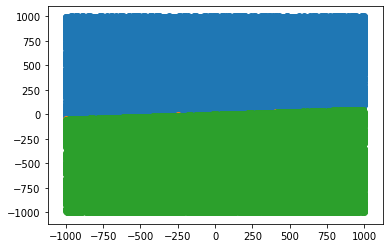

In [167]:
%matplotlib inline
points = calculate_positions(dataset, det_2x2, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()




#### wyznacznik 3x3

points left to the line = 50047
points on the line = 6
points tight to the line = 49947


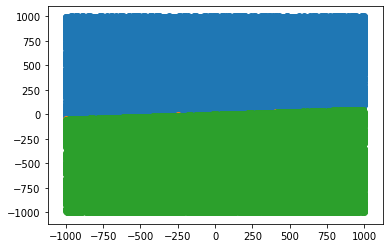

In [168]:

%matplotlib inline
points = calculate_positions(dataset, det_3x3, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()


#### difference

points allocated differently = 0


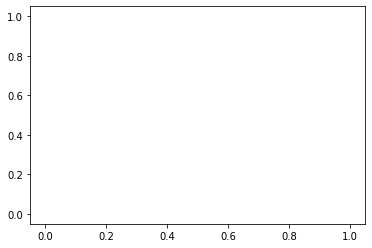

In [169]:
%matplotlib inline
diff =  [x for x in dataset if det_2x2(x, epsilon)!=det_3x3(x,epsilon)]
print('points allocated differently = ' + str(len(diff)))
plot = Plot([PointsCollection(diff)])
plot.draw()

### epsilon = 1

In [170]:
epsilon = 1


#### wyznacznik 2x2

points left to the line = 50028
points on the line = 45
points tight to the line = 49927


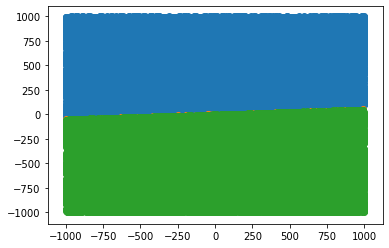

In [171]:
%matplotlib inline
points = calculate_positions(dataset, det_2x2, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()




#### wyznacznik 3x3

points left to the line = 50028
points on the line = 45
points tight to the line = 49927


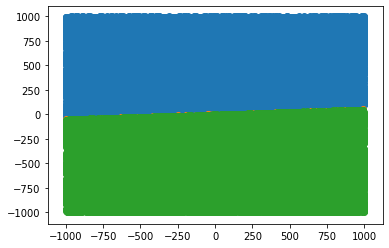

In [172]:

%matplotlib inline
points = calculate_positions(dataset, det_3x3, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()


#### difference

points allocated differently = 0


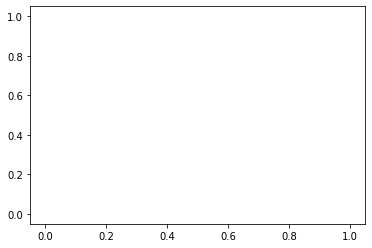

In [173]:
%matplotlib inline
diff =  [x for x in dataset if det_2x2(x, epsilon)!=det_3x3(x,epsilon)]
print('points allocated differently = ' + str(len(diff)))
plot = Plot([PointsCollection(diff)])
plot.draw()

### epsilon = 10

In [174]:
epsilon = 10


#### wyznacznik 2x2

points left to the line = 49816
points on the line = 475
points tight to the line = 49709


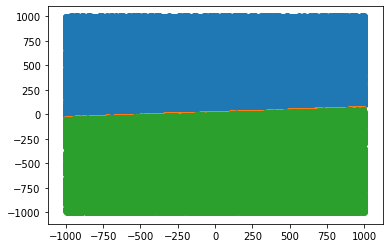

In [175]:
%matplotlib inline
points = calculate_positions(dataset, det_2x2, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()




#### wyznacznik 3x3

points left to the line = 49816
points on the line = 475
points tight to the line = 49709


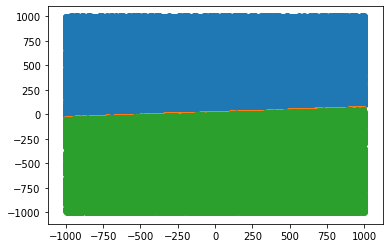

In [176]:

%matplotlib inline
points = calculate_positions(dataset, det_3x3, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()


#### difference

points allocated differently = 0


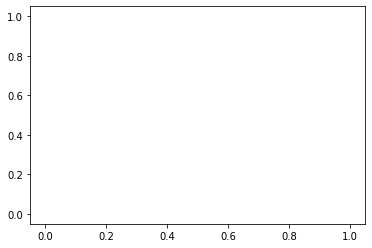

In [177]:
%matplotlib inline
diff =  [x for x in dataset if det_2x2(x, epsilon)!=det_3x3(x,epsilon)]
print('points allocated differently = ' + str(len(diff)))
plot = Plot([PointsCollection(diff)])
plot.draw()

## dataset 2

In [178]:
dataset = zad_1_b()

### epsilon = 0

In [179]:
epsilon = 0


#### wyznacznik 2x2

points left to the line = 50033
points on the line = 0
points tight to the line = 49967


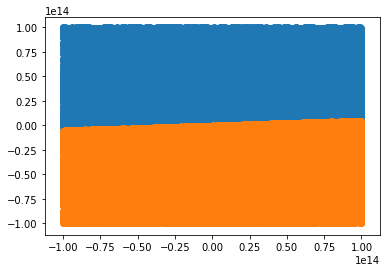

In [180]:
%matplotlib inline
points = calculate_positions(dataset, det_2x2, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()


#### wyznacznik 3x3

points left to the line = 50025
points on the line = 9
points tight to the line = 49966


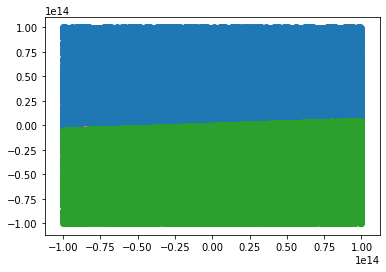

In [181]:

%matplotlib inline
points = calculate_positions(dataset, det_3x3, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()


#### difference

points allocated differently = 10


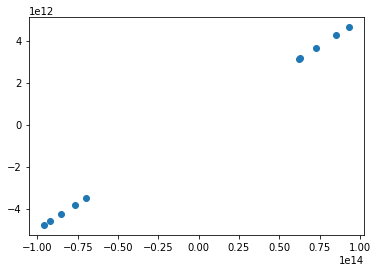

In [182]:
%matplotlib inline
diff =  [x for x in dataset if det_2x2(x, epsilon)!=det_3x3(x,epsilon)]
print('points allocated differently = ' + str(len(diff)))
plot = Plot([PointsCollection(diff)])
plot.draw()

### epsilon = 1

In [183]:
epsilon = 1


#### wyznacznik 2x2

points left to the line = 50033
points on the line = 0
points tight to the line = 49967


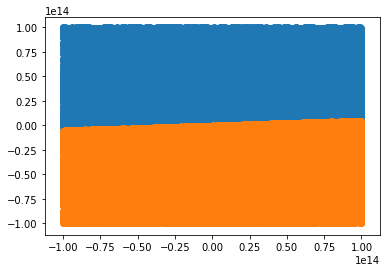

In [184]:
%matplotlib inline
points = calculate_positions(dataset, det_2x2, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()




#### wyznacznik 3x3

points left to the line = 50025
points on the line = 9
points tight to the line = 49966


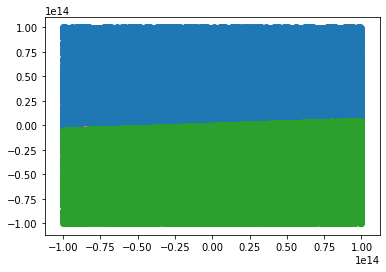

In [185]:

%matplotlib inline
points = calculate_positions(dataset, det_3x3, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()


#### difference

points allocated differently = 10


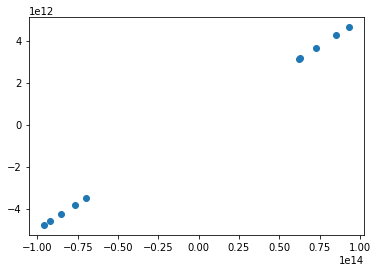

In [186]:
%matplotlib inline
diff =  [x for x in dataset if det_2x2(x, epsilon)!=det_3x3(x,epsilon)]
print('points allocated differently = ' + str(len(diff)))
plot = Plot([PointsCollection(diff)])
plot.draw()

### epsilon = 1^5

In [187]:
epsilon = pow(10, 5)


#### wyznacznik 2x2

points left to the line = 50033
points on the line = 0
points tight to the line = 49967


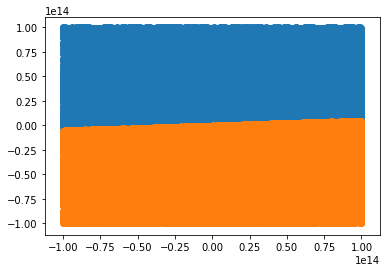

In [188]:
%matplotlib inline
points = calculate_positions(dataset, det_2x2, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()




#### wyznacznik 3x3

points left to the line = 50025
points on the line = 9
points tight to the line = 49966


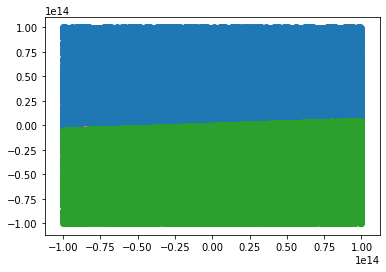

In [189]:

%matplotlib inline
points = calculate_positions(dataset, det_3x3, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()


#### difference

points allocated differently = 10


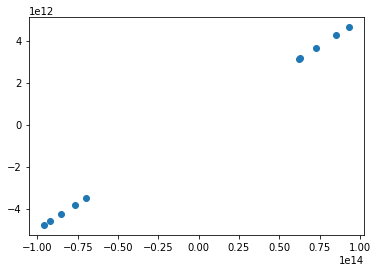

In [190]:
%matplotlib inline
diff =  [x for x in dataset if det_2x2(x, epsilon)!=det_3x3(x,epsilon)]
print('points allocated differently = ' + str(len(diff)))
plot = Plot([PointsCollection(diff)])
plot.draw()

### epsilon = 10^12

In [191]:
epsilon = pow(10,12)


#### wyznacznik 2x2

points left to the line = 49784
points on the line = 494
points tight to the line = 49722


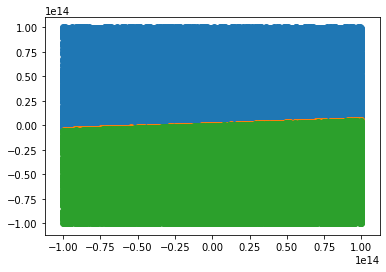

In [192]:
%matplotlib inline
points = calculate_positions(dataset, det_2x2, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()




#### wyznacznik 3x3

points left to the line = 49783
points on the line = 494
points tight to the line = 49723


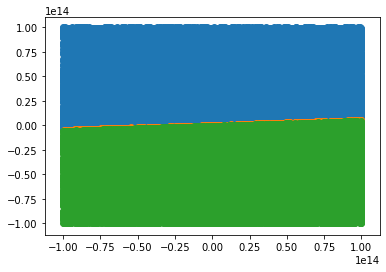

In [193]:

%matplotlib inline
points = calculate_positions(dataset, det_3x3, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()


#### difference

points allocated differently = 4


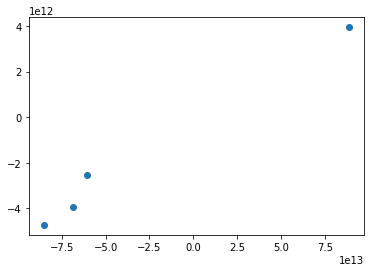

In [194]:
%matplotlib inline
diff =  [x for x in dataset if det_2x2(x, epsilon)!=det_3x3(x,epsilon)]
print('points allocated differently = ' + str(len(diff)))
plot = Plot([PointsCollection(diff)])
plot.draw()

## dataset 3

In [195]:
dataset = zad_1_c()

### epsilon = 0

In [196]:
epsilon = 0


#### wyznacznik 2x2

points left to the line = 514
points on the line = 0
points tight to the line = 486


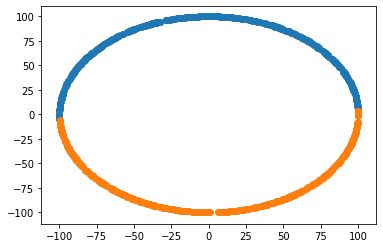

In [197]:
%matplotlib inline
points = calculate_positions(dataset, det_2x2, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()


#### wyznacznik 3x3

points left to the line = 514
points on the line = 0
points tight to the line = 486


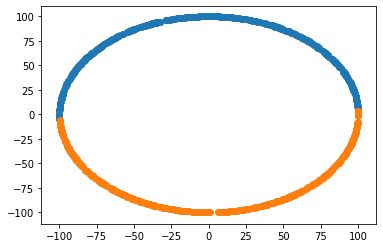

In [198]:

%matplotlib inline
points = calculate_positions(dataset, det_3x3, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()


#### difference

points allocated differently = 0


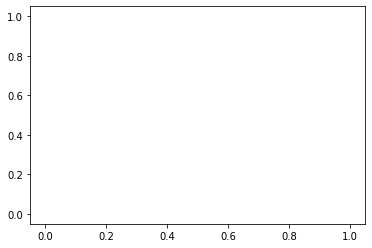

In [199]:
%matplotlib inline
diff =  [x for x in dataset if det_2x2(x, epsilon)!=det_3x3(x,epsilon)]
print('points allocated differently = ' + str(len(diff)))
plot = Plot([PointsCollection(diff)])
plot.draw()

### epsilon = 0.1

In [200]:
epsilon = 0.1


#### wyznacznik 2x2

points left to the line = 514
points on the line = 0
points tight to the line = 486


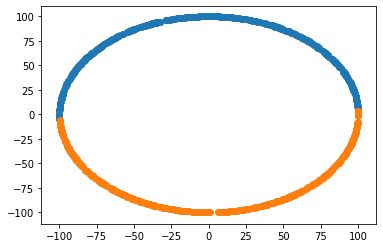

In [201]:
%matplotlib inline
points = calculate_positions(dataset, det_2x2, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()




#### wyznacznik 3x3

points left to the line = 514
points on the line = 0
points tight to the line = 486


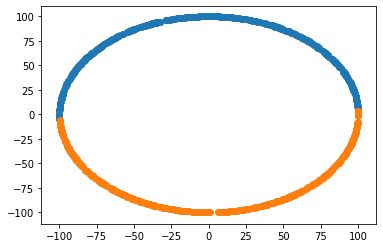

In [202]:

%matplotlib inline
points = calculate_positions(dataset, det_3x3, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()


#### difference

points allocated differently = 0


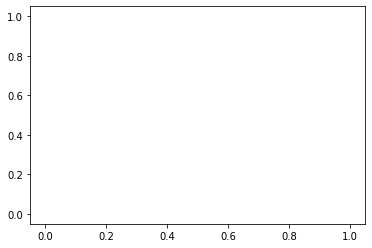

In [203]:
%matplotlib inline
diff =  [x for x in dataset if det_2x2(x, epsilon)!=det_3x3(x,epsilon)]
print('points allocated differently = ' + str(len(diff)))
plot = Plot([PointsCollection(diff)])
plot.draw()

### epsilon = 1

In [204]:
epsilon = 1


#### wyznacznik 2x2

points left to the line = 514
points on the line = 0
points tight to the line = 486


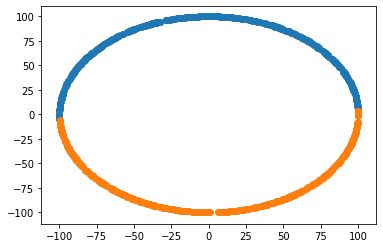

In [205]:
%matplotlib inline
points = calculate_positions(dataset, det_2x2, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()




#### wyznacznik 3x3

points left to the line = 514
points on the line = 0
points tight to the line = 486


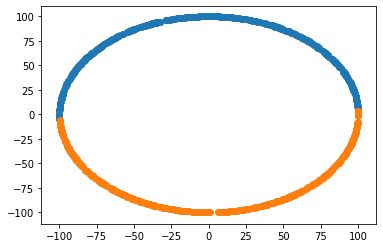

In [206]:

%matplotlib inline
points = calculate_positions(dataset, det_3x3, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()


#### difference

points allocated differently = 0


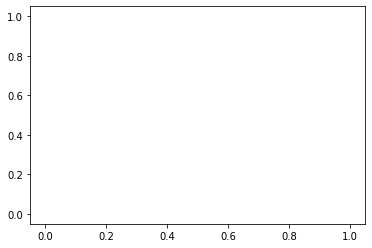

In [207]:
%matplotlib inline
diff =  [x for x in dataset if det_2x2(x, epsilon)!=det_3x3(x,epsilon)]
print('points allocated differently = ' + str(len(diff)))
plot = Plot([PointsCollection(diff)])
plot.draw()

### epsilon = 10

In [208]:
epsilon = 10


#### wyznacznik 2x2

points left to the line = 492
points on the line = 38
points tight to the line = 470


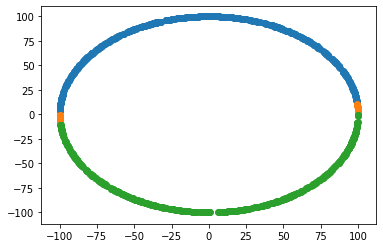

In [209]:
%matplotlib inline
points = calculate_positions(dataset, det_2x2, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()




#### wyznacznik 3x3

points left to the line = 492
points on the line = 38
points tight to the line = 470


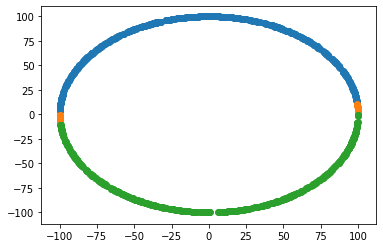

In [210]:

%matplotlib inline
points = calculate_positions(dataset, det_3x3, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()


#### difference

points allocated differently = 0


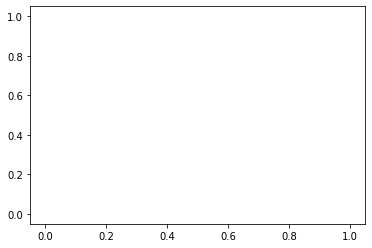

In [211]:
%matplotlib inline
diff =  [x for x in dataset if det_2x2(x, epsilon)!=det_3x3(x,epsilon)]
print('points allocated differently = ' + str(len(diff)))
plot = Plot([PointsCollection(diff)])
plot.draw()

## dataset 4

In [212]:
dataset = zad_1_d()

### epsilon = 0

In [213]:
epsilon = 0


#### wyznacznik 2x2

points left to the line = 166
points on the line = 426
points tight to the line = 408


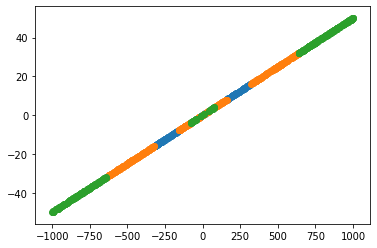

In [214]:
%matplotlib inline
points = calculate_positions(dataset, det_2x2, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()


#### wyznacznik 3x3

points left to the line = 127
points on the line = 716
points tight to the line = 157


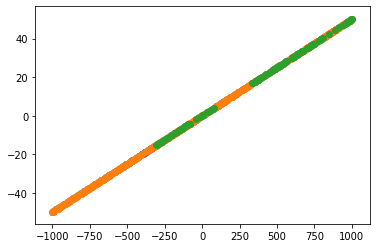

In [215]:

%matplotlib inline
points = calculate_positions(dataset, det_3x3, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()


#### difference

points allocated differently = 700


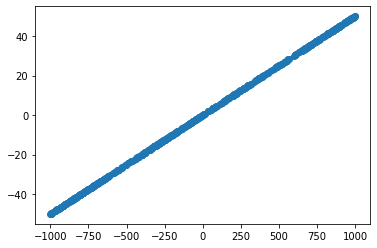

In [216]:
%matplotlib inline
diff =  [x for x in dataset if det_2x2(x, epsilon)!=det_3x3(x,epsilon)]
print('points allocated differently = ' + str(len(diff)))
plot = Plot([PointsCollection(diff)])
plot.draw()

### epsilon = 10^-5

In [217]:
epsilon = pow(10, -5)


#### wyznacznik 2x2

points left to the line = 0
points on the line = 1000
points tight to the line = 0


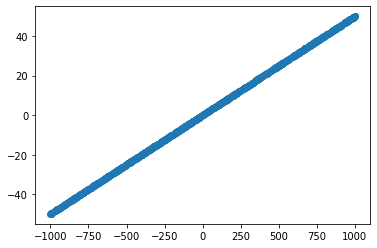

In [218]:
%matplotlib inline
points = calculate_positions(dataset, det_2x2, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()




#### wyznacznik 3x3

points left to the line = 0
points on the line = 1000
points tight to the line = 0


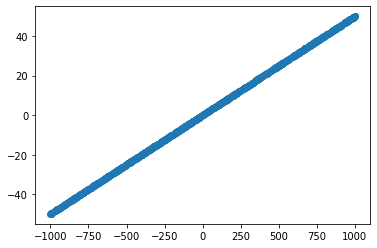

In [219]:

%matplotlib inline
points = calculate_positions(dataset, det_3x3, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()


#### difference

points allocated differently = 0


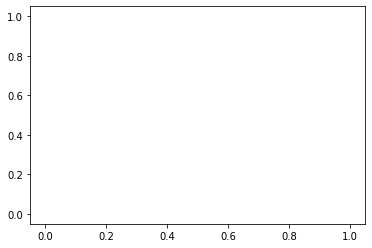

In [220]:
%matplotlib inline
diff =  [x for x in dataset if det_2x2(x, epsilon)!=det_3x3(x,epsilon)]
print('points allocated differently = ' + str(len(diff)))
plot = Plot([PointsCollection(diff)])
plot.draw()

### epsilon = 10^-12

In [221]:
epsilon = pow(10, -12)


#### wyznacznik 2x2

points left to the line = 0
points on the line = 1000
points tight to the line = 0


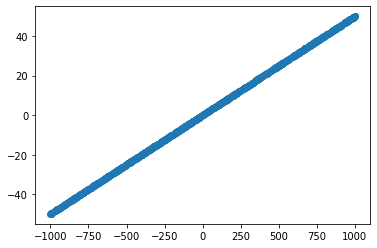

In [222]:
%matplotlib inline
points = calculate_positions(dataset, det_2x2, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()




#### wyznacznik 3x3

points left to the line = 65
points on the line = 852
points tight to the line = 83


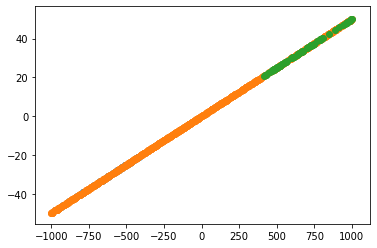

In [223]:

%matplotlib inline
points = calculate_positions(dataset, det_3x3, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()


#### difference

points allocated differently = 148


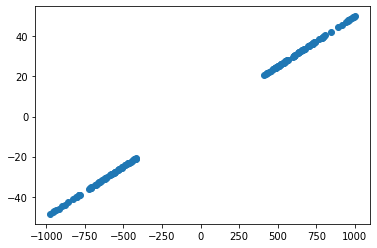

In [224]:
%matplotlib inline
diff =  [x for x in dataset if det_2x2(x, epsilon)!=det_3x3(x,epsilon)]
print('points allocated differently = ' + str(len(diff)))
plot = Plot([PointsCollection(diff)])
plot.draw()

### epsilon = 10^-15

In [225]:
epsilon = pow(10, -15)


#### wyznacznik 2x2

points left to the line = 158
points on the line = 476
points tight to the line = 366


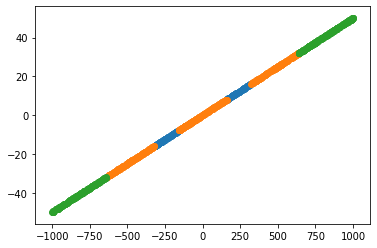

In [226]:
%matplotlib inline
points = calculate_positions(dataset, det_2x2, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()




#### wyznacznik 3x3

points left to the line = 124
points on the line = 723
points tight to the line = 153


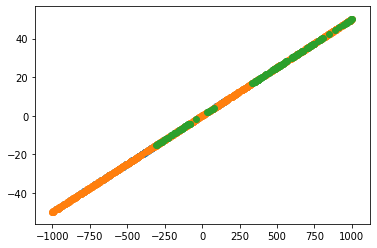

In [227]:

%matplotlib inline
points = calculate_positions(dataset, det_3x3, epsilon)
plot = Plot([points[0], points[2], points[1]])
plot.draw()


#### difference

points allocated differently = 660


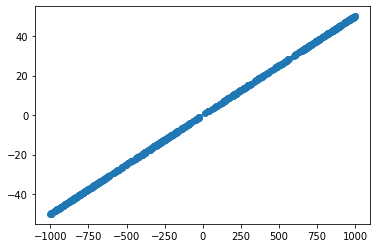

In [228]:
%matplotlib inline
diff =  [x for x in dataset if det_2x2(x, epsilon)!=det_3x3(x,epsilon)]
print('points allocated differently = ' + str(len(diff)))
plot = Plot([PointsCollection(diff)])
plot.draw()